# Initialization


In [1]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

from cb25d.compare_gamma_original import run_gamma_comparison_original
from cb25d.notebook import init, savefig
from cb25d.simulation_impl_original import (
    SimulationImplOriginal,
    generate_initial_conditions,
)

init()

pygame-ce 2.5.6 (SDL 2.32.10, Python 3.13.9)


# Gamma value comparison

## Initialization


In [2]:
p_base = Path("results/original/gamma")

## Computation


In [3]:
def compute(k: int):
    att_vals = np.arange(0, 0.6 + (step := 0.05), step)
    ali_vals = np.arange(0, 1.2 + (step := 0.1), step)
    statistics = run_gamma_comparison_original(
        seed=0,
        att_vals=att_vals,
        ali_vals=ali_vals,
        create_initial_state=lambda att, ali, seed: SimulationImplOriginal(
            c_eta=0.8,
            c_gamma_ali=ali,
            c_gamma_att=att,
            c_gamma_rand=0.2,
            c_k=k,
            c_l_ali=3,
            c_tau_0=0.8,
            **generate_initial_conditions(
                seed=seed,
                n=100,
                l_att=3,
            ),
        ),
        runs_per_config=20,
        steps_per_run=2000 * 100,
    )

    p = p_base / f"k={k}"
    p.mkdir(parents=True, exist_ok=True)
    np.save(p / "att.npy", att_vals)
    np.save(p / "ali.npy", ali_vals)
    np.save(p / "statistics.npy", statistics)

In [ ]:
compute(k=1)

  0%|          | 0/3380 [00:00<?, ?it/s]

In [ ]:
compute(k=2)

  0%|          | 0/3380 [00:00<?, ?it/s]

## Plot


In [30]:
def load(k: int):
    p = p_base / f"k={k}"
    return (
        np.load(p / "att.npy"),
        np.load(p / "ali.npy"),
        np.load(p / "statistics.npy"),
    )


k1 = load(k=1)
k2 = load(k=1)
assert np.array_equal(k1[:2], k2[:2])
att_vals, ali_vals = k1[:2]
statistics = np.array([k1[2], k2[2]])

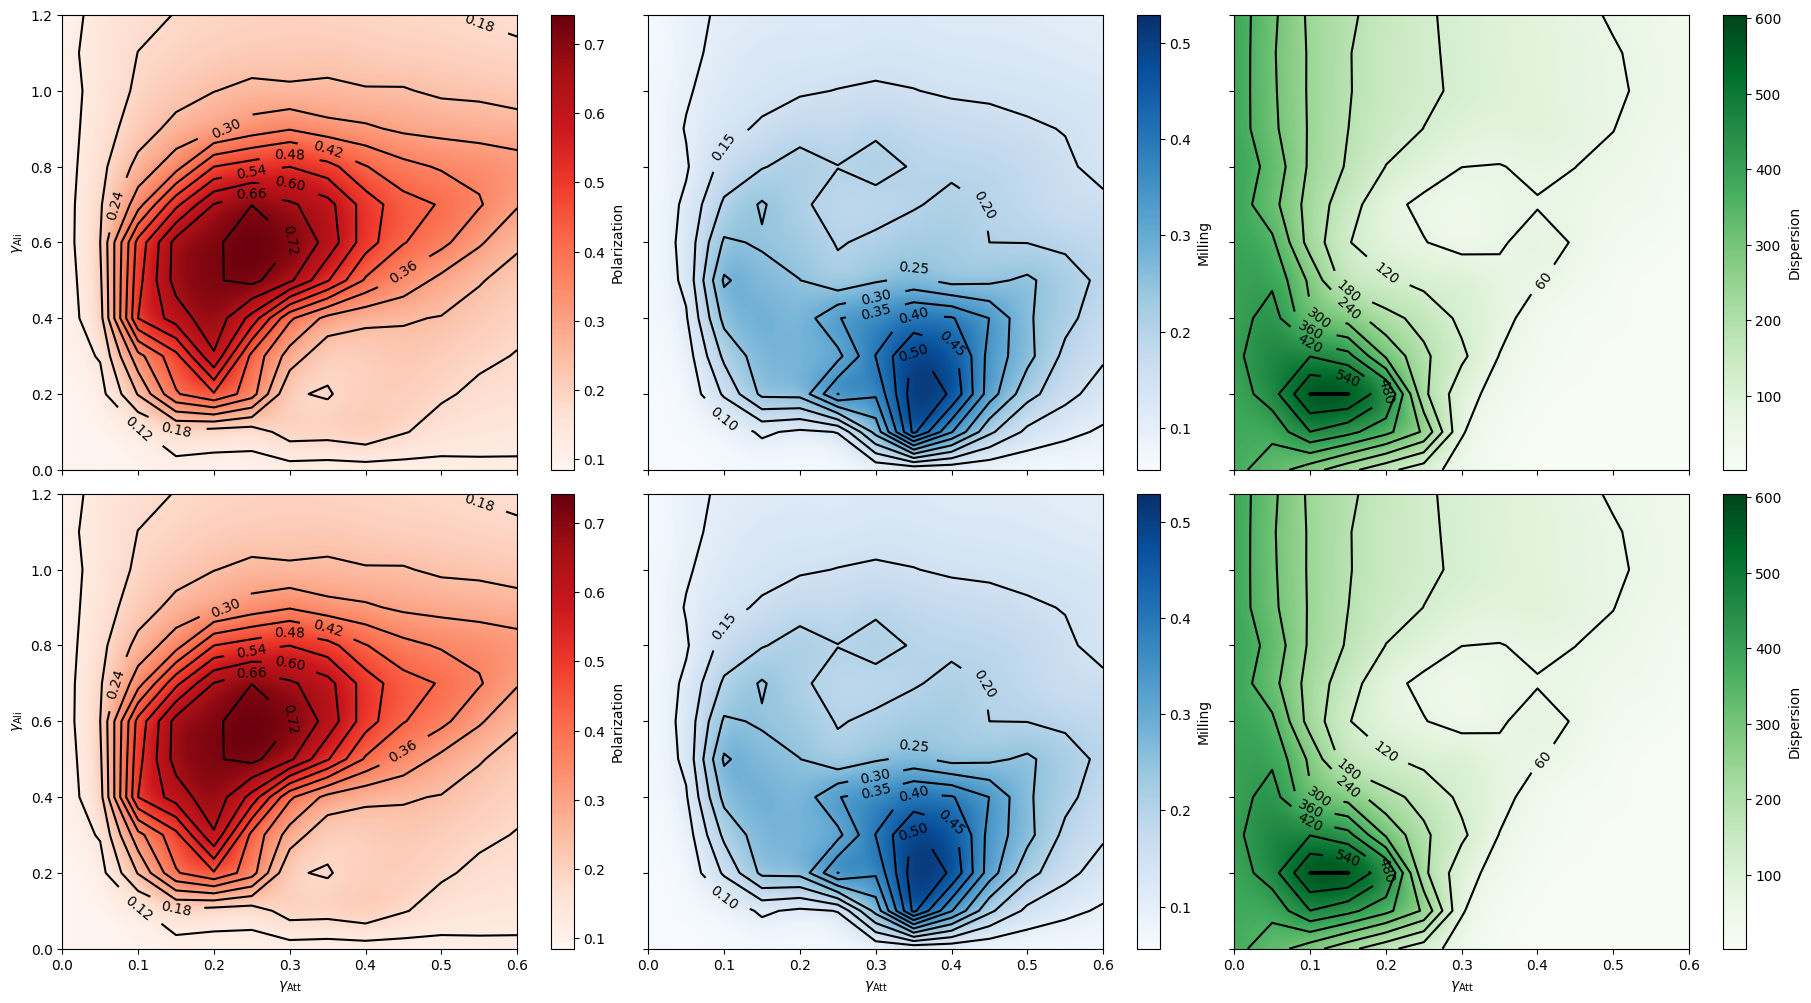

In [ ]:
fig, axd = plt.subplot_mosaic(
    """
    pmd
    PMD
    """,
    width_ratios=[1, 1, 1],
    figsize=(18, 10),
    layout="compressed",
)


def plot_single(
    ax: Axes,
    k: int,
    stat_i: int,
    cmap: str,
    cbar_label: str,
    set_xlabel: bool,
    set_ylabel: bool,
):
    dx = att_vals[1] - att_vals[0]
    dy = ali_vals[1] - ali_vals[0]
    data = statistics[k, :, :, stat_i].T
    im = ax.imshow(
        data,
        cmap=cmap,
        aspect="auto",
        interpolation="quadric",
        origin="lower",
        extent=(-dx / 2, att_vals.max() + dx / 2, -dy / 2, ali_vals.max() + dy / 2),
    )
    cbar = fig.colorbar(im, ax=ax)
    cntr = ax.contour(att_vals, ali_vals, data, levels=10, colors="k")
    ax.clabel(cntr, cntr.levels)  # type: ignore
    cbar.set_label(cbar_label)
    if set_xlabel:
        ax.set_xlabel(r"$\gamma_\text{Att}$")
    else:
        plt.setp(ax.get_xticklabels(), visible=False)
    if set_ylabel:
        ax.set_ylabel(r"$\gamma_\text{Ali}$")
    else:
        plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_xlim(att_vals[0], att_vals[-1])
    ax.set_ylim(ali_vals[0], ali_vals[-1])
    ax.set_box_aspect(1)


def plot_row(axs: str, k: int, set_xlabel: bool):
    axd[axs[2]].sharey(axd[axs[1]])
    axd[axs[3]].sharey(axd[axs[1]])
    plot_single(axd[axs[1]], k, 1, "Reds", "Polarization", set_xlabel, True)
    plot_single(axd[axs[2]], k, 2, "Blues", "Milling", set_xlabel, False)
    plot_single(axd[axs[3]], k, 0, "Greens", "Dispersion", set_xlabel, False)


axd["P"].sharex(axd["p"])
axd["M"].sharex(axd["m"])
axd["D"].sharex(axd["d"])
plot_row("lpmd", 1, False)
plot_row("LPMD", 1, True)

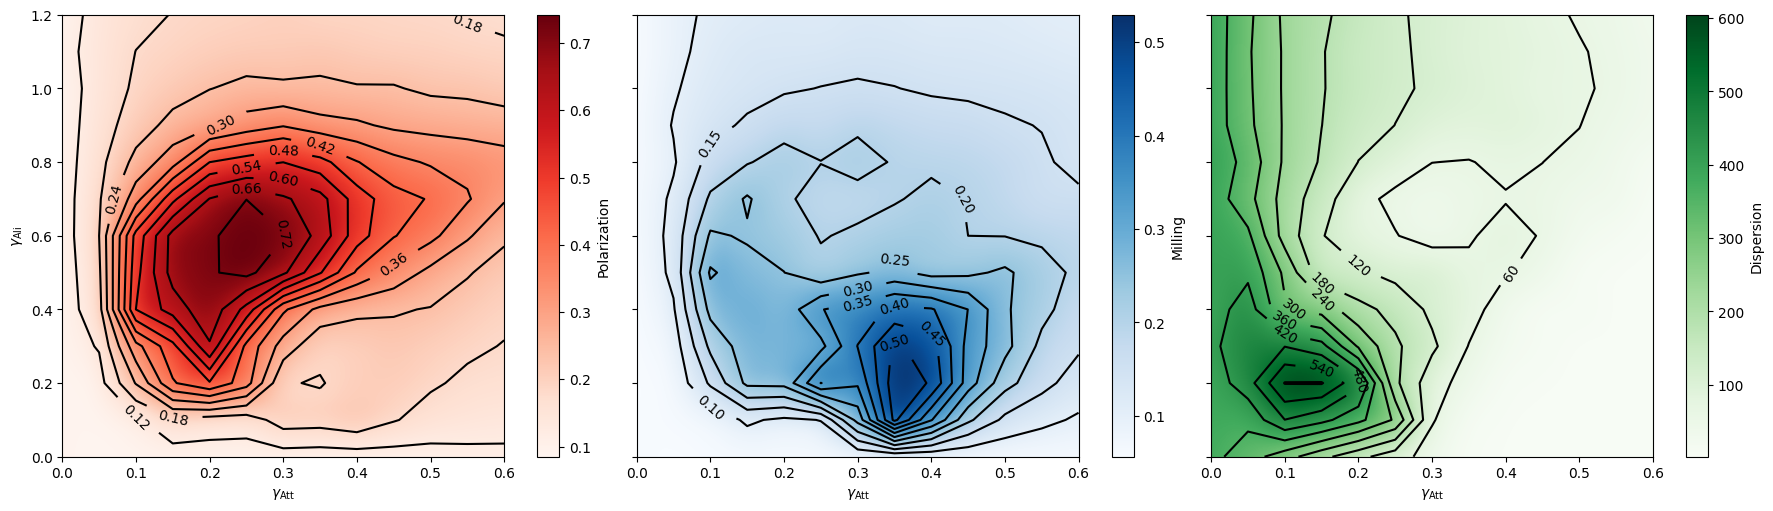

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, sharey=True, figsize=(18, 5), layout="compressed"
)
ax1: Axes
ax2: Axes
ax3: Axes

ax1.set_box_aspect(1)
ax2.set_box_aspect(1)
ax3.set_box_aspect(1)

ax1.set_ylabel(r"$\gamma_\text{Ali}$")


def contour(ax: Axes, stat_i: int, cmap: str, cbar_label: str):
    dx = att_vals[1] - att_vals[0]
    dy = ali_vals[1] - ali_vals[0]
    data = statistics[:, :, stat_i].T
    im = ax.imshow(
        data,
        cmap=cmap,
        aspect="auto",
        interpolation="quadric",
        origin="lower",
        extent=(-dx / 2, att_vals.max() + dx / 2, -dy / 2, ali_vals.max() + dy / 2),
    )
    cbar = fig.colorbar(im, ax=ax)
    cntr = ax.contour(att_vals, ali_vals, data, levels=10, colors="k")
    ax.clabel(cntr, cntr.levels)  # type: ignore
    cbar.set_label(cbar_label)
    ax.set_xlabel(r"$\gamma_\text{Att}$")
    ax.set_xlim(att_vals[0], att_vals[-1])
    ax.set_ylim(ali_vals[0], ali_vals[-1])


contour(ax1, 1, "Reds", "Polarization")
contour(ax2, 2, "Blues", "Milling")
contour(ax3, 0, "Greens", "Dispersion")

# savefig(fig, "fig/original/gamma/k=1.pdf")

array([[<Axes: ylabel='$\\gamma_{Ali}$'>, <Axes: >],
       [<Axes: ylabel='$\\gamma_{Ali}$'>, <Axes: >]], dtype=object)

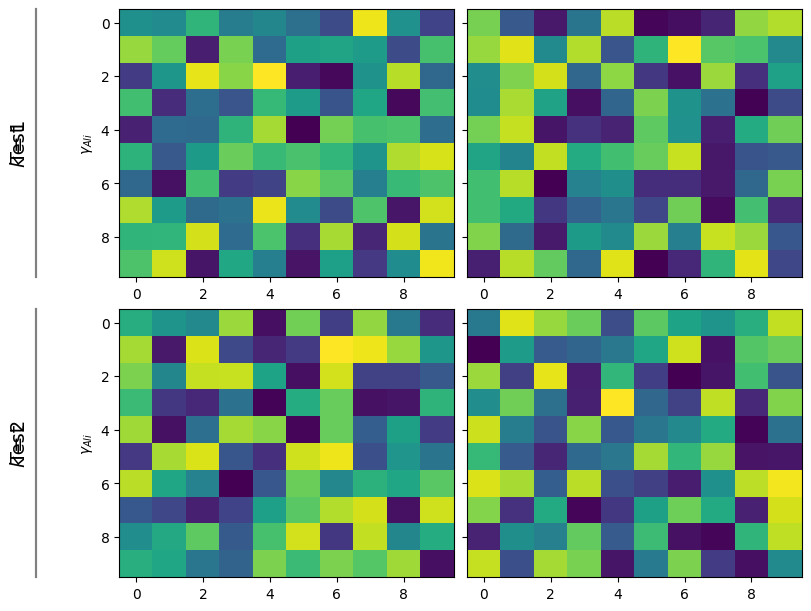

In [19]:
# 1. Setup Figure
fig, axes = plt.subplots(2, 2, figsize=(8, 6), layout="compressed")

data = [np.random.rand(10, 10) for _ in range(4)]
row_labels = [r"$k=1$", r"$k=2$"]

for i, row in enumerate(axes):
    target_ax = row[0]

    # 2. Add 'bracket' axis sharing X, but with independent Y geometry
    #    We use this purely for the annotation structure
    anno_ax = target_ax.twinx()

    # 3. Force geometry to the LEFT (Crucial Step)
    anno_ax.yaxis.set_label_position("left")
    anno_ax.yaxis.tick_left()

    # 4. Offset the spine outward by a fixed typographic distance (points)
    #    60 points clears the inner Y-label approx. independent of plot size
    anno_ax.spines["left"].set_position(("outward", 60))

    # 5. Styling: Show only the bracket line (left spine)
    anno_ax.spines["left"].set_visible(True)
    anno_ax.spines["left"].set_color("gray")
    anno_ax.spines["left"].set_linewidth(1.5)

    # Hide all other structure
    anno_ax.spines["top"].set_visible(False)
    anno_ax.spines["bottom"].set_visible(False)
    anno_ax.spines["right"].set_visible(False)
    anno_ax.set_yticks([])  # Clear ticks on the bracket

    # 6. Apply Label
    anno_ax.set_ylabel(row_labels[i], fontsize=14, labelpad=5, rotation=90)

    # 2. Add 'bracket' axis sharing X, but with independent Y geometry
    #    We use this purely for the annotation structure
    anno_ax = target_ax.twinx()

    # 3. Force geometry to the LEFT (Crucial Step)
    anno_ax.yaxis.set_label_position("left")
    anno_ax.yaxis.tick_left()

    # 4. Offset the spine outward by a fixed typographic distance (points)
    #    60 points clears the inner Y-label approx. independent of plot size
    anno_ax.spines["left"].set_position(("outward", 60))

    # 5. Styling: Show only the bracket line (left spine)
    anno_ax.spines["left"].set_visible(True)
    anno_ax.spines["left"].set_color("gray")
    anno_ax.spines["left"].set_linewidth(1.5)

    # Hide all other structure
    anno_ax.spines["top"].set_visible(False)
    anno_ax.spines["bottom"].set_visible(False)
    anno_ax.spines["right"].set_visible(False)
    anno_ax.set_yticks([])  # Clear ticks on the bracket

    # 6. Apply Label
    anno_ax.set_ylabel("Test", fontsize=14, labelpad=5, rotation=90)

    # --- Standard Plotting ---
    for j, ax in enumerate(row):
        ax.imshow(data[i * 2 + j], cmap="viridis", aspect="auto")
        if j == 0:
            ax.set_ylabel(r"$\gamma_{Ali}$")
        if j > 0:
            ax.set_yticklabels([])

axes

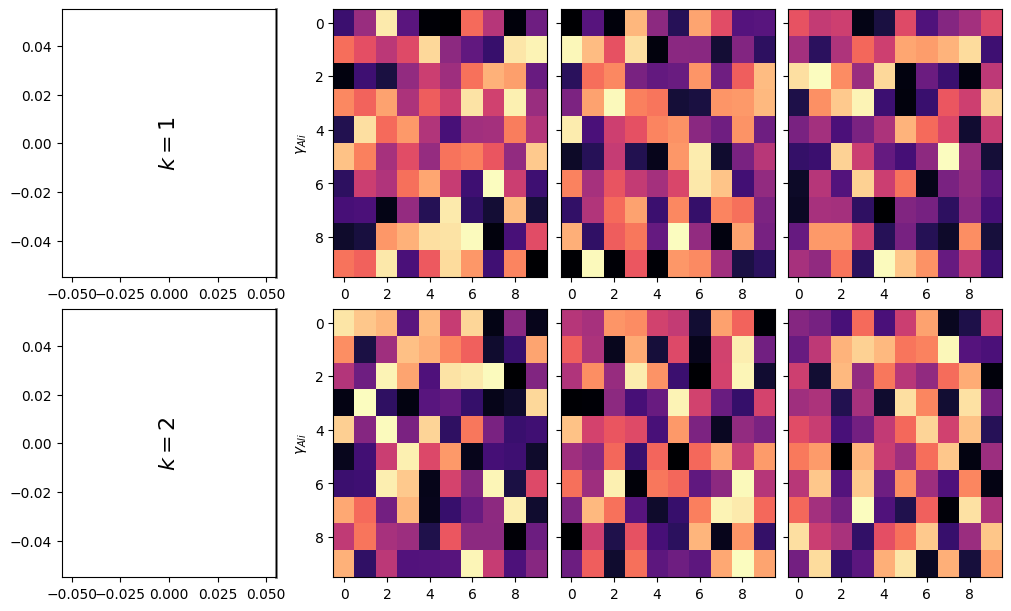

In [28]:
# 2. Setup Figure with width_ratios
# This is not "guessing" pixels; it defines the semantic weight of the sidebar
# relative to the data columns.
fig, axd = plt.subplot_mosaic(
    [
        ["p1_label", "p1_a", "p1_b", "p1_c"],
        ["p2_label", "p2_a", "p2_b", "p2_c"],
    ],
    figsize=(10, 6),
    layout="compressed",
    width_ratios=[1, 1, 1, 1],  # 5% width for labels, rest equal
)

# Configuration for the annotations
row_configs = [("p1_label", r"$k=1$"), ("p2_label", r"$k=2$")]

# 3. Draw Annotations in their dedicated Axes
for key, label in row_configs:
    ax = axd[key]

    # Clean the axis completely (it's a canvas, not a plot)
    # ax.axis("off")

    # Draw the Bracket (Vertical Line)
    # Using x=1.0 puts it exactly on the right edge of this designated space
    ax.plot(
        [1, 1], [0, 1], transform=ax.transAxes, color="gray", linewidth=2, clip_on=False
    )

    # Draw the Text
    # Centered in the allocated sidebar space
    ax.text(
        0.5,
        0.5,
        label,
        transform=ax.transAxes,
        rotation=90,
        va="center",
        ha="center",
        fontsize=16,
    )

# 4. Fill Data Plots (Standard Matplotlib)
data_keys = [k for k in axd if "label" not in k]
for key in data_keys:
    ax = axd[key]
    ax.imshow(np.random.rand(10, 10), cmap="magma", aspect="auto")

    # Y-labels only on the first data column
    if "_a" in key:
        ax.set_ylabel(r"$\gamma_{Ali}$")
    else:
        ax.set_yticklabels([])
